In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import investpy

## Make Function to made the change on data

In [193]:
def stock (name):
    name = name.upper()
    stock = investpy.get_stock_historical_data(stock=name, country='United States', from_date='01/01/2019', to_date='31/01/2021')
    stock.drop(['Currency'] , axis=1, inplace=True)
    stock['Daily Change'] = stock['Close'].pct_change()
    stock = stock.fillna(0)

    return stock

In [227]:
fb_df = stock('fb')

In [228]:
gme_df = stock('gme')

In [229]:
gme_df.head()

,Open,High,Low,Close,Volume,Daily Change
Date,,,,,,
2019-01-02,12.45,13.18,12.42,13.07,2124200,0.000000
2019-01-03,12.98,13.26,12.69,12.97,1750353,-0.007651
2019-01-04,14.03,15.29,13.70,15.24,11915692,0.175019
2019-01-07,15.11,15.81,14.94,15.48,4718028,0.015748
2019-01-08,15.50,15.88,15.15,15.81,3444019,0.021318


In [230]:
tsla_df = stock('tsla')

In [231]:
tsla_df.head()

,Open,High,Low,Close,Volume,Daily Change
Date,,,,,,
2019-01-02,61.22,63.03,59.76,62.02,58293240,0.000000
2019-01-03,61.40,61.88,59.48,60.07,34825920,-0.031441
2019-01-04,61.20,63.60,60.55,63.54,36970580,0.057766
2019-01-07,64.34,67.35,63.55,66.99,37756124,0.054297
2019-01-08,68.39,68.80,65.40,67.07,35042580,0.001194


## The Data For 3 Stock is :
    1- tsla
    2- gme
    3- fb
### Now let's get the profile for them to know how is this company batter

In [199]:
def profile (name):
    name = name.upper()
    profile = investpy.get_stock_company_profile(stock=name,country='United States')
    return profile['desc']

In [200]:
tesla_profile = profile('tsla')
tesla_profile

"Tesla, Inc. designs, develops, manufactures and sells electric vehicles and designs, manufactures, installs and sells solar energy generation and energy storage products. The Company's segments include automotive, and energy generation and storage. The automotive segment includes the design, development, manufacturing, sales and leasing of electric vehicles as well as sales of automotive regulatory credits. The energy generation and storage segment include the design, manufacture, installation, sales and leasing of solar energy generation and energy storage products, services related to its products, and sales of solar energy system incentives. Its automotive products include Model 3, Model Y, Model S and Model X. Model 3 is a four-door sedan. Model Y is a sport utility vehicle (SUV) built on the Model 3 platform. Model S is a four-door sedan. Model X is an SUV. Its energy storage products include Powerwall and Powerpack."

In [201]:
gme_profile = profile('gme')
gme_profile

'GameStop Corp. is an omnichannel video game retailer. The Company sells video game hardware, physical and digital video game software, video game accessories, as well as mobile and consumer electronics products and other merchandise through its GameStop, EB Games and Micromania stores. It operating segments, which consists of Video Game Brands segments: United States, Canada and Australia and Europe. Each of the Video Game Brands segments consists primarily of retail operations, with all stores engaged in the sale of new and pre-owned video game systems, software and accessories, which it refers to as video game products. Its Video Game Brands stores sell various types of digital products, including downloadable content, network points cards, prepaid digital, and also sell certain mobile and consumer electronics products and collectible products.'

In [233]:
fb_profile = profile('fb')
fb_profile

"Facebook, Inc. is focused on building products that enable people to connect and share through mobile devices, personal computers and other surfaces. The Company's products include Facebook, Instagram, Messenger, WhatsApp and Oculus. Facebook enables people to connect, share, discover and communicate with each other on mobile devices and personal computers. Instagram enables people to take photos or videos, customize them with filter effects, and share them with friends and followers in a photo feed or send them directly to friends. Messenger allows communicating with people and businesses alike across a range of platforms and devices. WhatsApp Messenger is a messaging application that is used by people around the world and is available on a range of mobile platforms. Its Oculus virtual reality technology and content platform offers products that allow people to enter an interactive environment to play games, consume content and connect with others."

# Save the data and EDA 

In [234]:
tsla_df.to_csv('tsla.csv')
gme_df.to_csv('gme.csv')
fb_df.to_csv('fb.csv')

In [260]:
tsla = pd.read_csv('tsla.csv',index_col='Date')
gme = pd.read_csv('gme.csv',index_col='Date')
fb = pd.read_csv('fb.csv' ,index_col='Date')
tsla.head()

,Open,High,Low,Close,Volume,Daily Change
Date,,,,,,
2019-01-02,61.22,63.03,59.76,62.02,58293240,0.000000
2019-01-03,61.40,61.88,59.48,60.07,34825920,-0.031441
2019-01-04,61.20,63.60,60.55,63.54,36970580,0.057766
2019-01-07,64.34,67.35,63.55,66.99,37756124,0.054297
2019-01-08,68.39,68.80,65.40,67.07,35042580,0.001194


In [262]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 2019-01-02 to 2021-01-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          524 non-null    float64
 1   High          524 non-null    float64
 2   Low           524 non-null    float64
 3   Close         524 non-null    float64
 4   Volume        524 non-null    int64  
 5   Daily Change  524 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 28.7+ KB


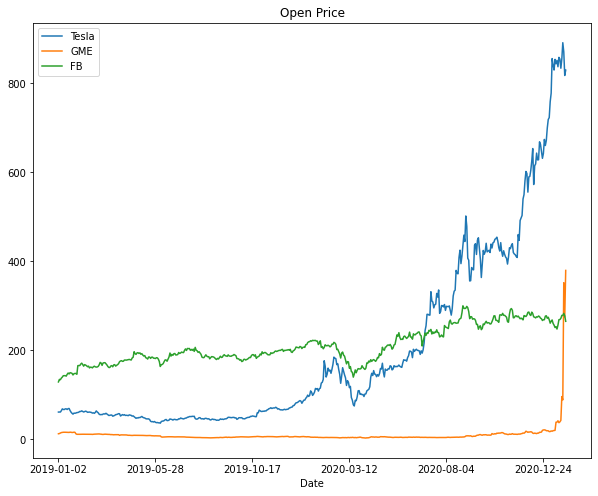

In [317]:
tsla['Open'].plot(label='Tesla',figsize=(10,8),title='Open Price')
gme['Open'].plot(label='GME')
fb['Open'].plot(label='FB')
plt.legend();

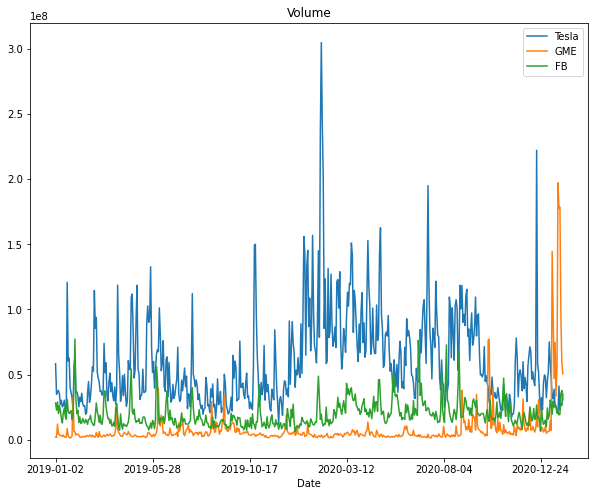

In [264]:
tsla['Volume'].plot(label='Tesla',figsize=(10,8),title='Volume')
gme['Volume'].plot(label='GME')
fb['Volume'].plot(label='FB')
plt.legend();

# The Total tradeing for the day

In [268]:
tsla['Total Traded'] = tsla['Open']*tsla['Volume']
fb['Total Traded'] = fb['Open']*fb['Volume']
gme['Total Traded'] = gme['Open']*gme['Volume']

In [269]:
tsla.head()

,Open,High,Low,Close,Volume,Daily Change,Total Traded
Date,,,,,,,
2019-01-02,61.22,63.03,59.76,62.02,58293240,0.000000,3.568712e+09
2019-01-03,61.40,61.88,59.48,60.07,34825920,-0.031441,2.138311e+09
2019-01-04,61.20,63.60,60.55,63.54,36970580,0.057766,2.262599e+09
2019-01-07,64.34,67.35,63.55,66.99,37756124,0.054297,2.429229e+09
2019-01-08,68.39,68.80,65.40,67.07,35042580,0.001194,2.396562e+09


## Plot the trading By Time

Text(0, 0.5, 'Total Traded')

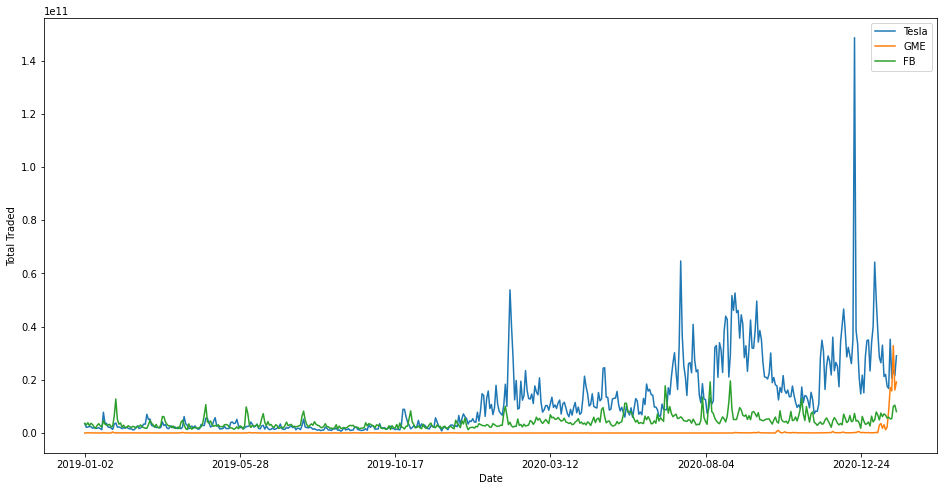

In [270]:
tsla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gme['Total Traded'].plot(label='GME')
fb['Total Traded'].plot(label='FB')
plt.legend()
plt.ylabel('Total Traded')

## plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM.

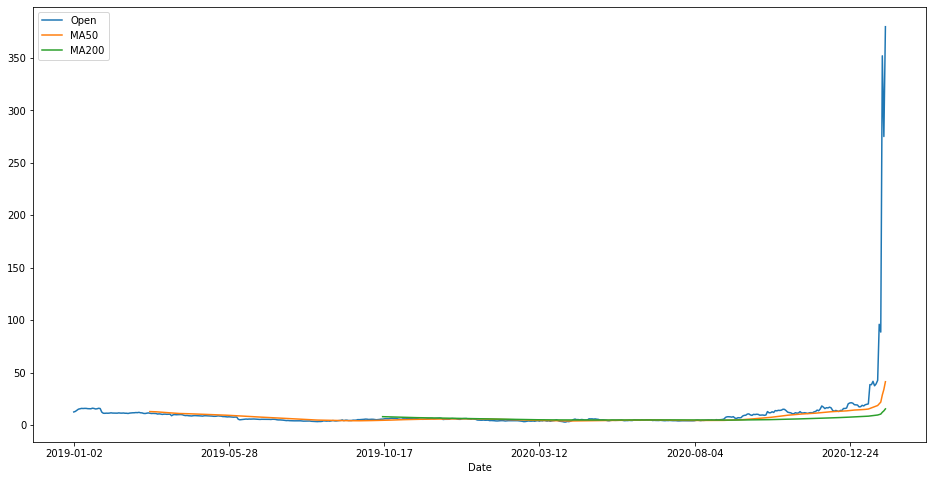

In [349]:
gme['MA50'] = gme['Open'].rolling(50).mean()
gme['MA200'] = gme['Open'].rolling(200).mean()
gme[['Open','MA50','MA200']].plot(label='gme',figsize=(16,8));

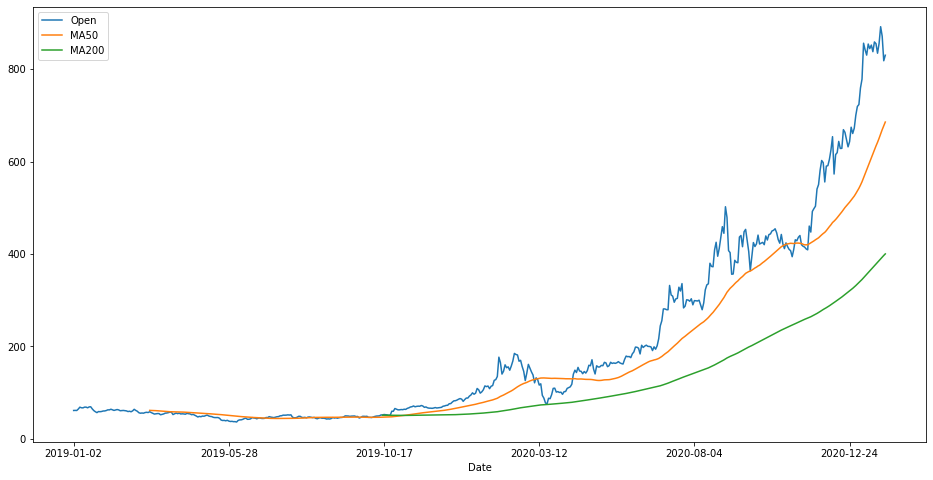

In [353]:
tsla['MA50'] = tsla['Open'].rolling(50).mean()
tsla['MA200'] = tsla['Open'].rolling(200).mean()
tsla[['Open','MA50','MA200']].plot(label='Tesla',figsize=(16,8));

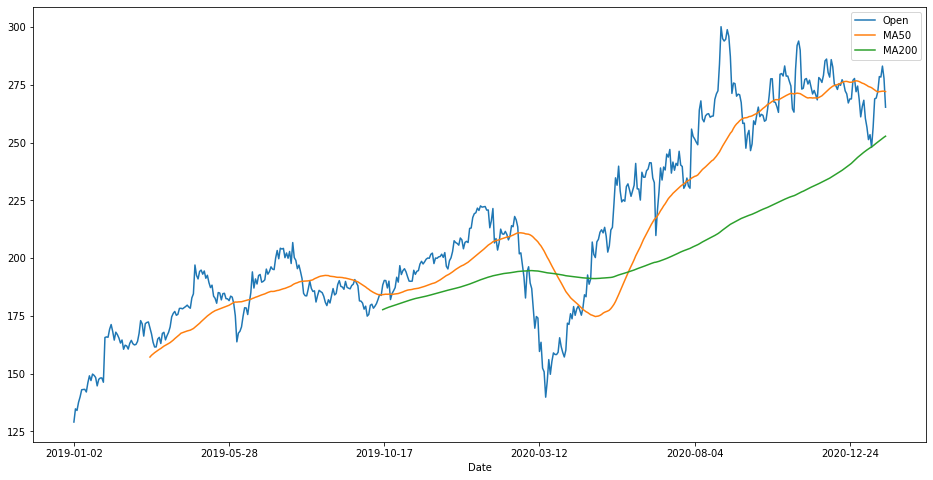

In [351]:
fb['MA50'] = fb['Open'].rolling(50).mean()
fb['MA200'] = fb['Open'].rolling(200).mean()
fb[['Open','MA50','MA200']].plot(label='Fb',figsize=(16,8));

In [272]:
tsla['Volume'].argmax()

274

# EWMA
## Exponentially-weighted moving average 

However, basic SMA has some "weaknesses".
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an EWMA (Exponentially-weighted moving average).

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows)
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:

$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $

Where x_t is the input value, w_i is the applied weight (Note how it can change from i=0 to t), and y_t is the output.

Now the question is, how to we define the weight term w_i ?

This depends on the adjust parameter you provide to the .ewm() method.

When adjust is True (default), weighted averages are calculated using weights:

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When adjust=False is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When adjust=True we have y0=x0 and from the last representation above we have yt=αxt+(1−α)yt−1, therefore there is an assumption that x0 is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

One must have 0<α≤1, and while since version 0.18.0 it has been possible to pass α directly, it’s often easier to think about either the span, center of mass (com) or half-life of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* Span corresponds to what is commonly called an “N-day EW moving average”.
* Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s−1)/2
* Half-life is the period of time for the exponential weight to reduce to one half.
* Alpha specifies the smoothing factor directly.

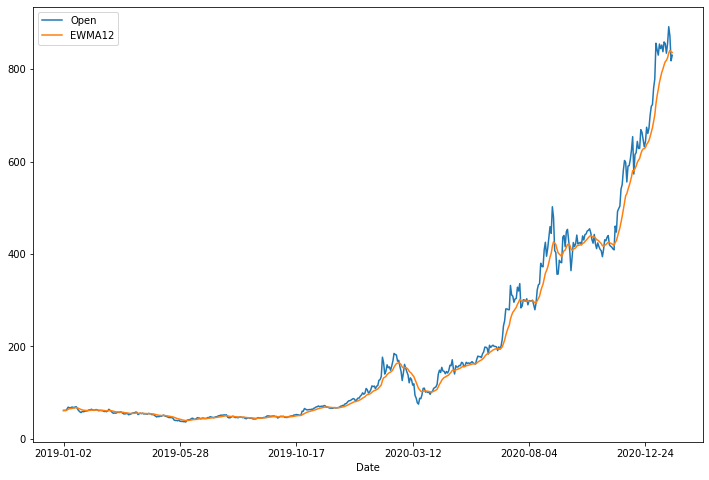

In [343]:
tsal['EWMA12'] = tsal['Open'].ewm(span=12).mean()
tsal[['Open','EWMA12']].plot(figsize=(12,8));

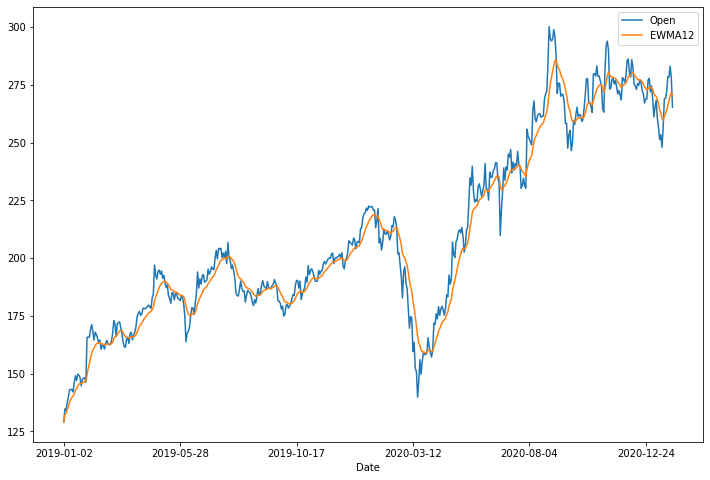

In [344]:
fb['EWMA12'] = fb['Open'].ewm(span=12).mean()
fb[['Open','EWMA12']].plot(figsize=(12,8));

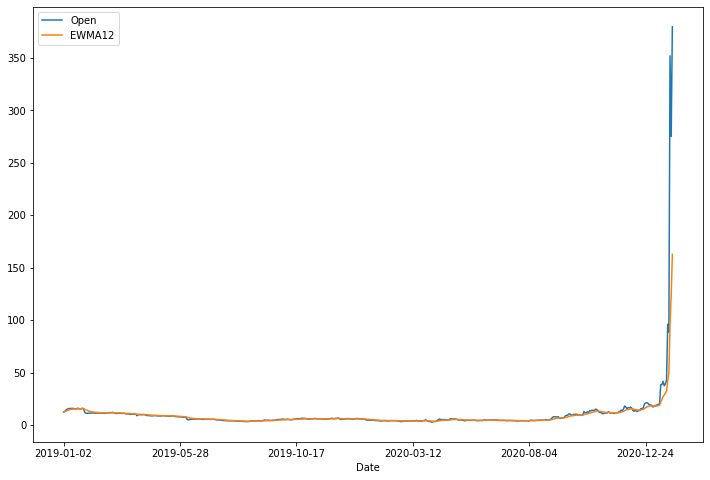

In [345]:
gme['EWMA12'] = gme['Open'].ewm(span=12).mean()
gme[['Open','EWMA12']].plot(figsize=(12,8));

## All Moving Avrage

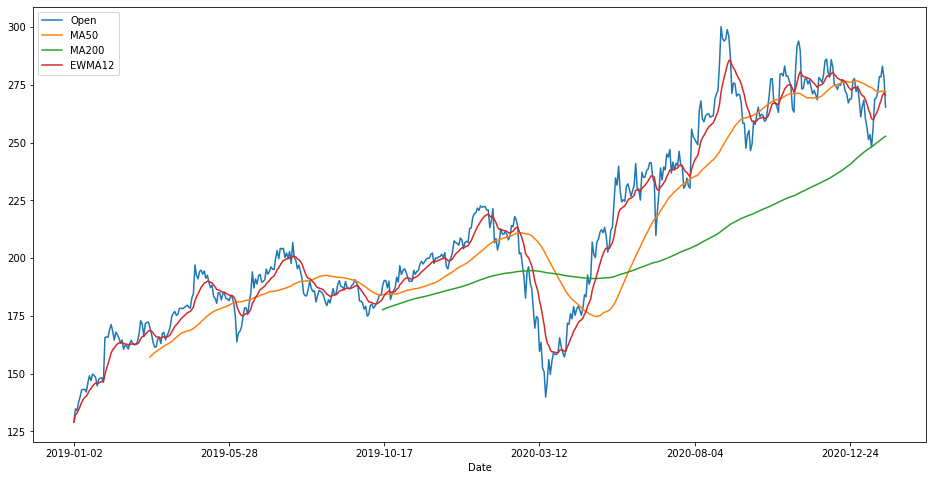

In [346]:
fb[['Open','MA50','MA200','EWMA12']].plot(label='Fb',figsize=(16,8));

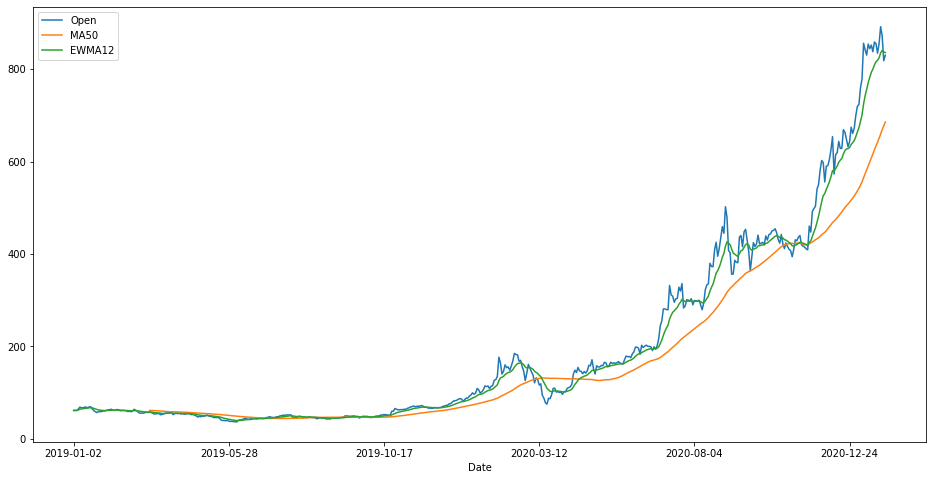

In [355]:
tsal[['Open','MA50','EWMA12']].plot(label='Tsla',figsize=(16,8));

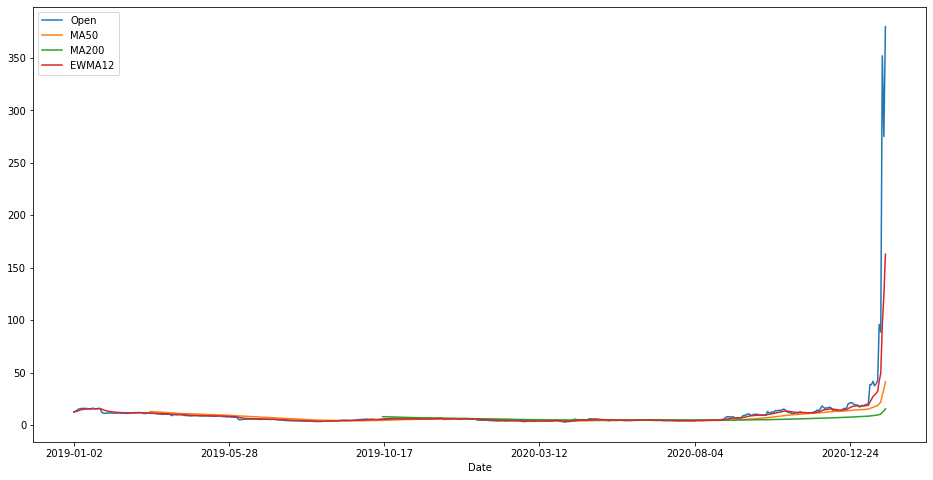

In [348]:
gme[['Open','MA50','MA200','EWMA12']].plot(label='Gme',figsize=(16,8));

In [274]:
from pandas.plotting import scatter_matrix

In [276]:
car_comp = pd.concat([tsla['Open'],gme['Open'],fb['Open']],axis=1)

In [277]:
car_comp.columns = ['Tesla Open','GME Open','FB Open']

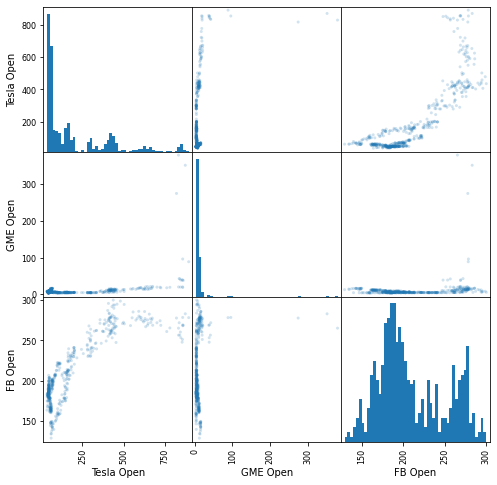

In [278]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

# Return change Evry Day's

In [286]:
fb['returns'] = fb['Close'].pct_change(1)
fb = fb.fillna(0)
gme['returns'] = gme['Close'].pct_change(1)
gme = gme.fillna(0)
tsla['returns'] = tsla['Close'].pct_change(1)
tsal = tsla.fillna(0)

In [287]:
fb.head()

,Open,High,Low,Close,Volume,Daily Change,Total Traded,returns
Date,,,,,,,,
2019-01-02,128.99,137.51,128.56,135.68,28146192,0.000000,3.630577e+09,0.000000
2019-01-03,134.69,137.17,131.12,131.74,22717948,-0.029039,3.059880e+09,-0.029039
2019-01-04,134.01,138.00,133.75,137.95,29002060,0.047138,3.886566e+09,0.047138
2019-01-07,137.56,138.87,135.91,138.05,20089336,0.000725,2.763489e+09,0.000725
2019-01-08,139.89,143.14,139.54,142.53,26263792,0.032452,3.674042e+09,0.032452


## Which stock is the most "volatile"?

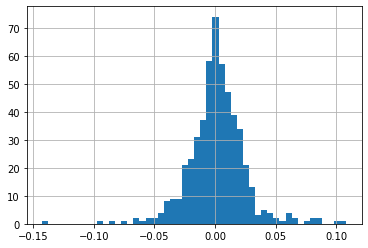

In [289]:
fb['returns'].hist(bins=50);

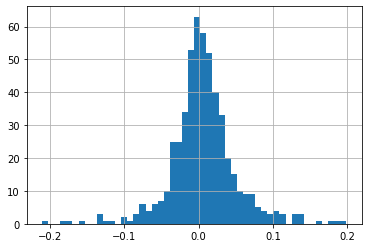

In [290]:
tsla['returns'].hist(bins=50);

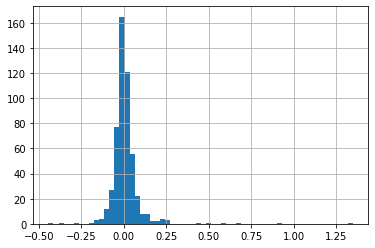

In [294]:
gme['returns'].hist(bins=60);

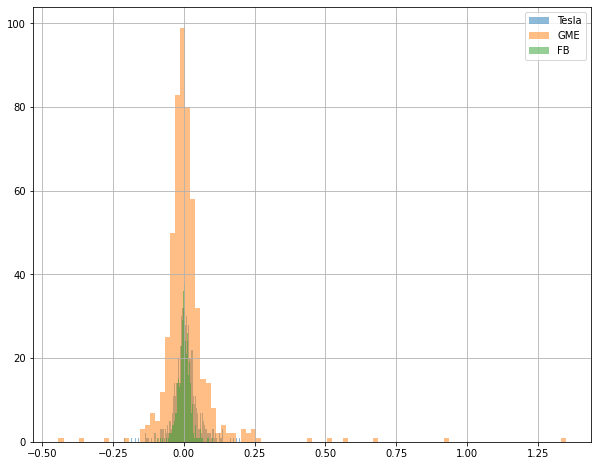

In [296]:
tsal['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gme['returns'].hist(bins=100,label='GME',alpha=0.5)
fb['returns'].hist(bins=100,label='FB',alpha=0.5)
plt.legend();

## Which stock has the widest plot?

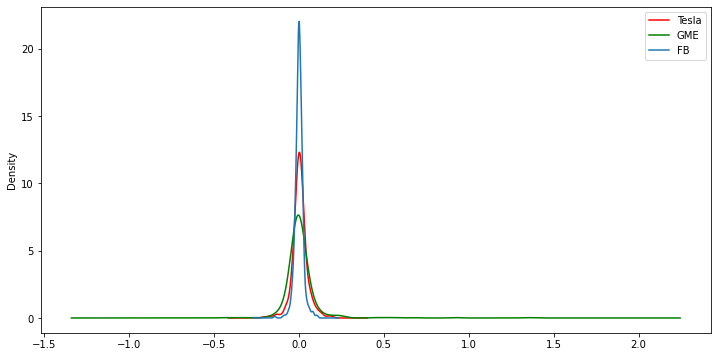

In [302]:
tsla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6),color='r')
gme['returns'].plot(kind='kde',label='GME', color ='g')
fb['returns'].plot(kind='kde',label='FB')
plt.legend();

## Comparing the returns

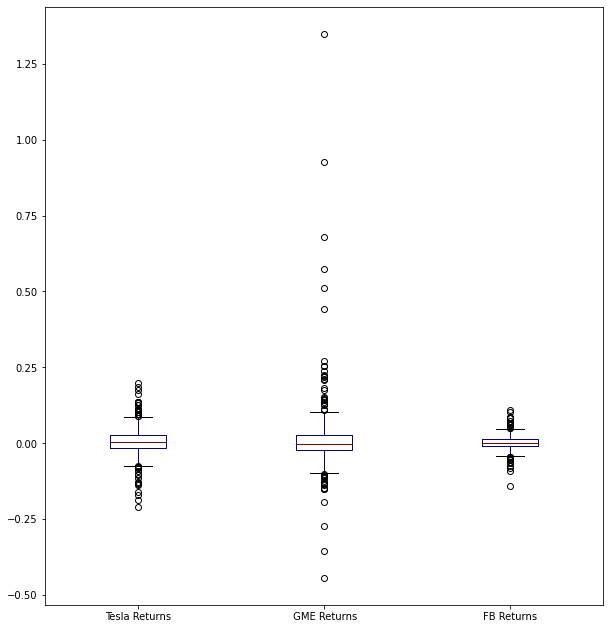

In [305]:
box_df = pd.concat([tsla['returns'],gme['returns'],fb['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GME Returns','FB Returns']
box_df.plot(kind='box',figsize=(10,11),colormap='jet');

# Comparing Daily Returns between Stocks

    Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?

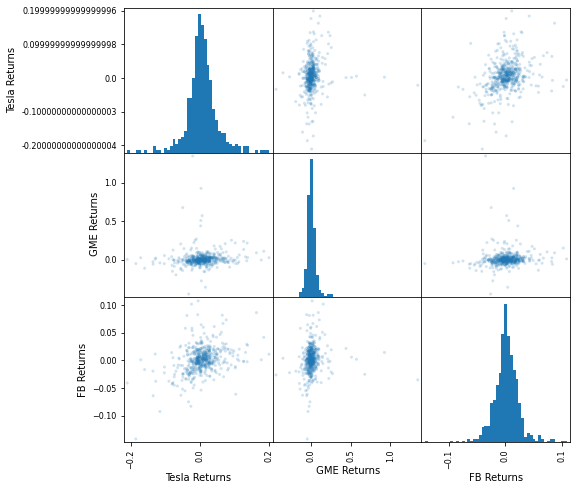

In [306]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

    It looks like FaceBook and Tesla do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!

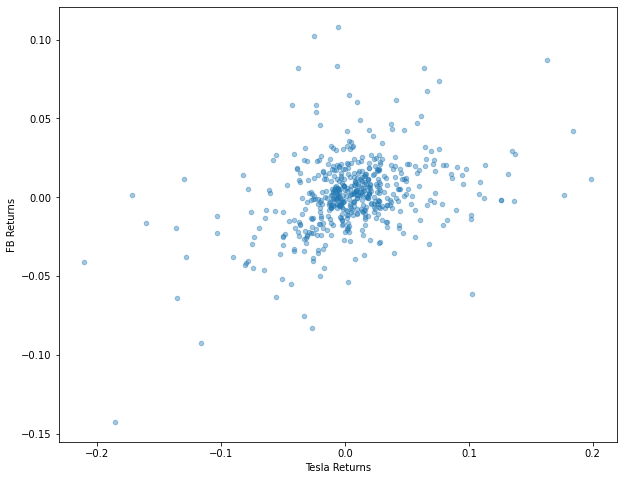

In [309]:
box_df.plot(kind='scatter',x='Tesla Returns',y='FB Returns',alpha=0.4,figsize=(10,8));

# Cumulative Daily Returns

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what we just calculated above). A value above one indicates profit .

similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

Create a cumulative daily return column for each company's dataframe.

In [311]:
tsla['Cumulative Return'] = (1 + tsla['returns']).cumprod()

In [312]:
tsla.head()

,Open,High,Low,Close,Volume,Daily Change,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2019-01-02,61.22,63.03,59.76,62.02,58293240,0.000000,3.568712e+09,NaN,NaN
2019-01-03,61.40,61.88,59.48,60.07,34825920,-0.031441,2.138311e+09,-0.031441,0.968559
2019-01-04,61.20,63.60,60.55,63.54,36970580,0.057766,2.262599e+09,0.057766,1.024508
2019-01-07,64.34,67.35,63.55,66.99,37756124,0.054297,2.429229e+09,0.054297,1.080135
2019-01-08,68.39,68.80,65.40,67.07,35042580,0.001194,2.396562e+09,0.001194,1.081425


In [313]:
fb['Cumulative Return'] = (1 + fb['returns']).cumprod()
gme['Cumulative Return'] = (1 + gme['returns']).cumprod()

Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?

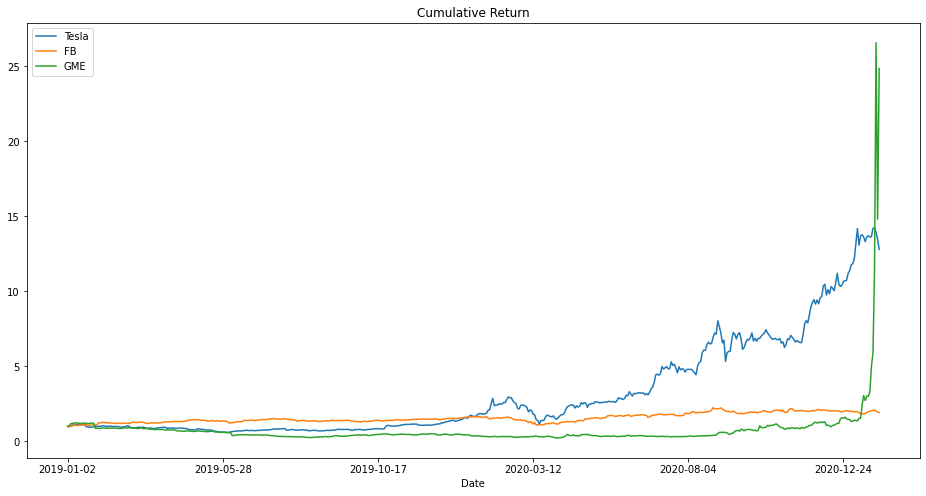

In [315]:
tsla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
fb['Cumulative Return'].plot(label='FB')
gme['Cumulative Return'].plot(label='GME')
plt.legend();

In [316]:
gme.head()

,Open,High,Low,Close,Volume,Daily Change,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2019-01-02,12.45,13.18,12.42,13.07,2124200,0.000000,2.644629e+07,0.0,0.0,0.000000,1.000000
2019-01-03,12.98,13.26,12.69,12.97,1750353,-0.007651,2.271958e+07,0.0,0.0,-0.007651,0.992349
2019-01-04,14.03,15.29,13.70,15.24,11915692,0.175019,1.671772e+08,0.0,0.0,0.175019,1.166029
2019-01-07,15.11,15.81,14.94,15.48,4718028,0.015748,7.128940e+07,0.0,0.0,0.015748,1.184392
2019-01-08,15.50,15.88,15.15,15.81,3444019,0.021318,5.338229e+07,0.0,0.0,0.021318,1.209640


## ماهي الفائده من التحليل السابق

اولا : شنو سويت ؟
    ١- سحبت البيانات من مكتبة لمده معينه
    ٢- عملت داله لسحب وحذف الصفوف الغير مرغوبه
    ٣- سحب ملف كل شركه 
    ٤- حفظ البيانات واستراجعها لمعالجه التاريخ
    ٥- استخراج نسبة التغيير اليومي
    ٦- شارت ليبين مسار سعر الافتتاح لكل سهم
    ٧- شارت ليبين حجم التداول في كل سهم
    ٨- حجم التداول اليومي لكل سهم في صف جديد
    ٩- استخراج المتوسط الحسابي ٢٠ و ٢٠٠ لكل سهم(شارت + صف(
    ١٠- شارت لتبيان العلاقه بين الاسهم كلها
    ١١- تحليل العلاقه الموحجوده بين سهم فيسبوك وتسلا
    ١٢- حجم التذبذب في كل سهم 
    ١٣- التذبذب مقارنه بكل سهم ( سوف نحتاجه في حساب نسب المخاطره)
    ١٤- استخراج العائد اليومي للسهم سواء بالربح او الخساره
    ١٥- مقارنه العائد اليومي لجميع الاسهم
    ١٦-شارت العائد اليومي لكل الاسهم

## الفائده من التحليل 
- تذبذب الاسهم يساهم في حساب المخاطره
- خلال الاسبوع السابق من البيانات gme تحقق العائد الاعلى من بين حميع الاسهم
- الاستمار في سهم فيسبوك اعلى نسبه ثبات وبارباح متتاليه
    